# Face Detection Pipeline

## Disclaimer on the Use of the Labeled Faces in the Wild (LFW) Dataset

There are a good many datasets used in Machine Learning and AI that have controversial origins or applications. This dataset is one of them. 

**Purpose of Dataset Use**

This project utilizes the Labeled Faces in the Wild (LFW) dataset for research and educational purposes. The LFW dataset is widely used in academic and research communities for tasks related to facial recognition, verification, and identification. Our project uses this dataset to explore machine learning techniques for facial recognition in a non-commercial, academic setting.

**Public Availability of Data**

The LFW dataset consists of publicly available images of well-known individuals. These images were sourced from the web, and the individuals in the dataset are public figures. The use of this dataset falls under "fair use" for research and educational purposes, as it was specifically curated to advance research in facial recognition technologies.

**Potential Ethical Issues and Dataset Limitations**

The LFW dataset has several potential issues that users should be aware of:

* Lack of Explicit Consent: The individuals in the dataset did not explicitly consent to having their images used for machine learning and AI research. Although these images are publicly available, it is important to recognize that consent was not directly obtained for this specific use case.

* Lack of representation: The LFW dataset contains a disproportionate number of images of people from specific demographic groups, particularly Caucasian males. This introduces potential bias into any model trained on the dataset, as it will not perform equally well across different races, genders, and age groups. This is an important point to highlight- if the AI community is going to address these issues we can't delete the data and hope it goes away. 

* Privacy Considerations: Although the dataset contains images of public figures, it is essential to understand that facial recognition technology can be controversial due to privacy concerns. This project is not intended or commercial purposes or to deploy it in applications that may infringe on individual privacy rights.

**Justification for Use**

We have chosen to use the LFW dataset due to its broad acceptance in the research community and its availability as a standardized dataset for facial recognition tasks. By using a commonly accepted dataset, we can benchmark our findings against existing research and contribute to the academic discourse on facial recognition technologies.

**Mitigation of Issues**

I acknowledge the problematic history of this dataset and it's limitations:

* Transparency: We are transparent about the limitations of this dataset in terms of representation and consent. The results and insights derived from this dataset should be interpreted with caution, and we advise against deploying models trained solely on LFW in real-world applications without further validation on more improved represantation in the datasets.
* Ethical Considerations: This project is purely educational and exploratory in nature. We do not intend to commercialize the technology developed in this project, and no personal or private data is involved.




Accuracy: 84.50%


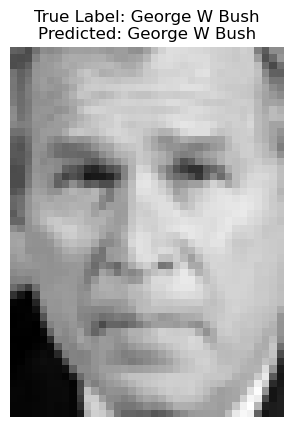

In [13]:
# Import necessary libraries
from sklearn import datasets
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Load the LFW people dataset (which contains labeled face images)
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Get the face images and corresponding labels (targets)
X = lfw_people.images  # Grayscale images
y = lfw_people.target

# Function to extract HoG features from an image
def extract_hog_features(images):
    hog_features = []
    for img in images:
        # Extract HoG features directly from grayscale images
        features = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
        hog_features.append(features)
    return np.array(hog_features)

# Extract HoG features from the dataset
hog_features = extract_hog_features(X)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(hog_features, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
clf = SVC(kernel='linear')

# Train the SVM classifier on the training data
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Visualize sample predictions 
def visualize_sample_predictions(y_test, y_pred, original_images, test_index):
    plt.imshow(original_images[test_index], cmap='gray')  # Use the correct original image from the test set
    plt.title(f"True Label: {lfw_people.target_names[y_test[test_index]]}\nPredicted: {lfw_people.target_names[y_pred[test_index]]}")
    plt.axis('off')
    plt.show()

# We should use X_test_original, which stores the correct original images for the test set.
_, X_test_original, _, y_test_original = train_test_split(X, y, test_size=0.2, random_state=42)  # Split again to get correct original test images

# Visualize one of the test images with the correct true label and prediction
visualize_sample_predictions(y_test, y_pred, X_test_original, test_index=0)


In [14]:
# Let's generalize this to faces or not faces. 

